# **Wine Spirit**
Studying wines for a company

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import winelib as wl

## **I. Importing data from Excel files**

In [2]:
erp_df = pd.read_excel("..\data\RAW\erp.xlsx")
liaison_df = pd.read_excel("..\data\RAW\liaison.xlsx")
web_df = pd.read_excel("..\data\RAW\web.xlsx")

C:\Users\simplon\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## **II. Analysis**


### **1. Exploring the data**

First, I need to explore what columns are important to keep datawise

In [3]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [4]:
web_df.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


From the .info and .describe I can see that some columns have only NaN values and others have only '0' values.\n
We'll not need these for any analysis.

In [5]:
web_df.groupby('sku')['sku'].count()

sku
38                     2
41                     2
304                    2
523                    2
531                    2
                      ..
19820                  2
19821                  2
19822                  2
13127-1                2
bon-cadeau-25-euros    2
Name: sku, Length: 714, dtype: int64

In [6]:
web_df['sku'].str.contains("bon-cadeau-25-euros").sort_values()

797     False
1511    False
0        True
1209     True
1         NaN
        ...  
1507      NaN
1508      NaN
1509      NaN
1510      NaN
1512      NaN
Name: sku, Length: 1513, dtype: object

In [7]:

pd.DataFrame((web_df.iloc[0], web_df.iloc[1209]))

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### **2. Cleaning the data**

In [8]:
web_df_clean = wl.cleaning_web_df(web_df)

### **3. Merging the tables**

In [9]:
fusion = wl.merge_tables(erp_df, liaison_df, web_df_clean)

In [10]:
fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   total_sales        714 non-null    float64       
 8   tax_status         714 non-null    object        
 9   post_author        714 non-null    float64       
 10  post_date          714 non-null    datetime64[ns]
 11  post_date_gmt      714 non-null    datetime64[ns]
 12  post_title         714 non-null    object        
 13  post_excerpt       714 non-null    object        
 14  post_statu

### **4. Visualising the merged tables**

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

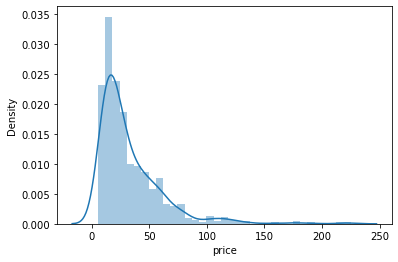

In [11]:
sb.distplot(fusion['price'])

### **5. Calculating the turnover of each products**

In [12]:
fusion['turnover'] = fusion['total_sales'] * fusion['price']

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='turnover', ylabel='Density'>

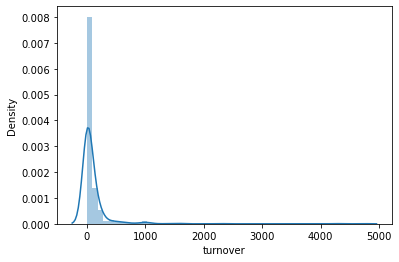

In [13]:
sb.distplot(fusion['turnover'])

In [14]:
fusion['turnover'].sum()

70568.6

### **6. Getting the outliers through 4 methods**

using the zscore method

In [15]:
outliers_zscore = wl.outliers_zscore(fusion, 'price')
len(outliers_zscore)/len(fusion)

0.04201680672268908

In [16]:
outliers_iqr = wl.outliers_iqr(fusion, 'price')
len(outliers_iqr)/len(fusion)

0.04481792717086835

In [17]:
fusion['outlier'] = fusion.price.isin(outliers_zscore.price)

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

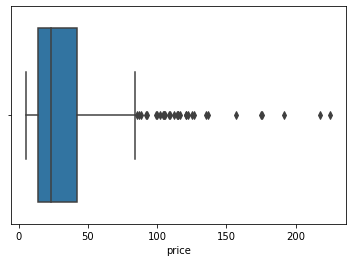

In [18]:
sb.boxplot(fusion['price'])

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='total_sales'>

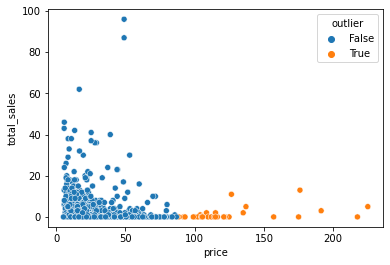

In [19]:
sb.scatterplot(fusion['price'], fusion['total_sales'], hue = fusion['outlier'])

## **III. Creating an IA algorithm**

### We'll use a *kmeans* method with clusters

### **1. Splitting the data into 2 groups : a training group and a test group**

In [20]:
x_train, x_test  = train_test_split(fusion[['price', 'total_sales']], test_size = 0.3, random_state = 42)

NameError: name 'train_test_split' is not defined

### **2. Applying the kmeans algorithm with 5 clusters**

In [ ]:
x_train, x_test = wl.clustering_kmeans(x_train, x_test)

### **3. Displaying the clusters in different colors**

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='total_sales'>

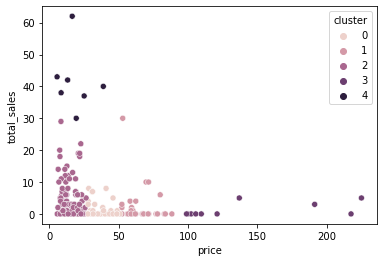

In [ ]:
sb.scatterplot(x_test['price'], x_test['total_sales'], hue=x_test['cluster'])

In [ ]:
x_test.groupby('cluster')[['price', 'total_sales', 'turnover']].mean() - x_test[['price', 'total_sales', 'turnover']].mean()

,price,total_sales,turnover
cluster,,,
0,2.182884,-3.118605,-59.264233
1,31.547308,-1.976180,40.461283
2,-18.349464,-0.105561,-37.819798
3,106.934884,-2.918605,141.699767
4,-15.623688,37.495681,651.466910


### **We can see that the clusters are mainly price-dependant.**
### The clusters **#2** and **#4** are both containing cheap products, but we can see that cluster **#4** regroup the most sold products of all the dataset
### The cluster **#0** regroups mid range price and sales products
### The cluster **#1** regroups high priced products and mid ranged sales
### Finally, the **#3** cluster regroups all the most expensive wines, this cluster can be associated with the outliers as atypical values.
